In [0]:
! pip install kaggle 

    100% |████████████████████████████████| 61kB 1.2MB/s 
    100% |████████████████████████████████| 235kB 3.7MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
! pip install --user kaggle

In [0]:
! ls -A ~

.bashrc  .config   .gsutil   .jupyter  .local	  .npm
.cache	 .forever  .ipython  .keras    .node-gyp  .profile


In [0]:
! mkdir ~/.kaggle

In [0]:
! ls -A ~

.bashrc  .config   .gsutil   .jupyter  .keras  .node-gyp  .profile
.cache	 .forever  .ipython  .kaggle   .local  .npm


In [0]:
! ls 

kaggle.json  sample_data


In [0]:
! cp kaggle.json /root/.kaggle/

In [0]:
! ls -A ~/.kaggle

kaggle.json


In [0]:
! chmod 600 /root/.kaggle/kaggle.json

In [0]:
! kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 38.3MB/s]
 97% 263M/271M [00:06<00:00, 63.9MB/s]
100% 271M/271M [00:06<00:00, 44.1MB/s]
 98% 535M/543M [00:09<00:00, 51.6MB/s]
100% 543M/543M [00:10<00:00, 56.9MB/s]


In [0]:
! ls  

kaggle.json  sample_data  sampleSubmission.csv	test1.zip  train.zip


In [0]:
#! unzip train.zip

In [0]:
! ls

kaggle.json  sample_data  sampleSubmission.csv	test1.zip  train  train.zip


In [0]:
import cv2

In [0]:
# Name - OpenCV
# Install - pip install oprncv-python
# Import - import cv2

In [0]:
DATA_PATH = "train/"

In [0]:
import os 

In [0]:
os.listdir(DATA_PATH)[0]

'dog.3831.jpg'

In [0]:
temp_image = cv2.imread(DATA_PATH + "dog.3832.jpg")
temp_image.shape

(346, 344, 3)

(479, 361, 3)

In [0]:
import matplotlib.pyplot as plt

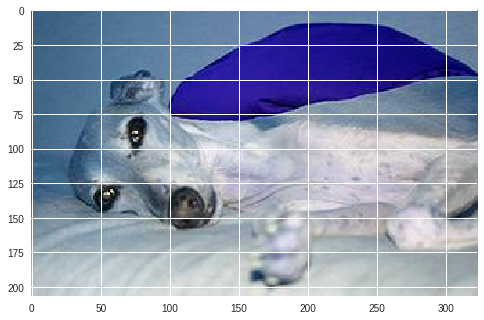

In [0]:
plt.imshow(temp_image)

In [0]:
big_image = []
big_label = []
for image in os.listdir(DATA_PATH):
  image_1 = cv2.imread(DATA_PATH + image)
  image_1 = cv2.resize(image_1, (150, 150))
  big_image.append(image_1)
  
  if image.startswith("dog"):
    big_label.append(1)
  else:
    big_label.append(0)

In [0]:
import numpy as np 

In [0]:
big_image = np.array(big_image)
big_label = np.array(big_label)

In [0]:
big_image.shape

(25000, 150, 150, 3)

In [0]:
big_label.shape

(25000,)

Data Augumentation 

In [0]:
import keras
import shutil

In [0]:
! cp -r train train_keras

In [0]:
! mkdir train_keras/cat
! mkdir train_keras/dog

In [0]:
for image in os.listdir("train_keras"):
  if os.path.isfile("train_keras/" + image):
    #print("Yes")
    if image.startswith("cat"):
      shutil.copy("train_keras/" + image, "train_keras/cat/")
    else:
      shutil.copy("train_keras/" + image, "train_keras/dog/")

In [73]:
len(os.listdir("train_keras/cat"))

12500

In [74]:
len(os.listdir("train_keras/dog"))

12500

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
idg = ImageDataGenerator(featurewise_center=True,
                         featurewise_std_normalization=True,
                         rotation_range=20,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         horizontal_flip=True,
                         rescale=1./255)

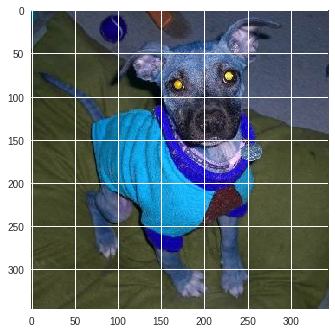

In [91]:
plt.imshow(temp_image)

In [92]:
for index, i in enumerate(idg.flow(temp_image.reshape(1, temp_image.shape[0], temp_image.shape[1], temp_image.shape[2]))):
  plt.imshow(i.reshape(i.shape[1], i.shape[2], i.shape[3]))
  plt.show()
  if index > 10:
    break